<a href="https://colab.research.google.com/github/dinuka125/Gender-Recognition-System-using-Deep-learning/blob/master/Copy_of_CNN_%2B_LSTM_SAMP_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
path ='/content/drive/My Drive/csv_files/'

Mounted at /content/drive


In [2]:
import numpy as np

data=np.load(path+'datasamp.npy')
target=np.load(path+'targetsamp.npy')

In [3]:
print(data.shape)
print(target.shape)
print(data.shape[1:])

(2559, 50, 4)
(2559,)
(50, 4)


In [4]:
train_data=data[:1791]
train_target=target[:1791]

test_data=data[1791:]
test_target=target[1791:]

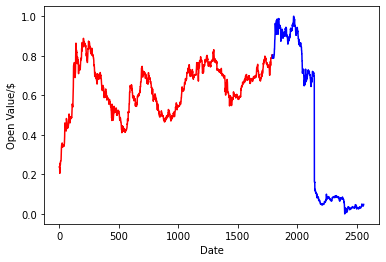

In [5]:
from matplotlib import pyplot as plt

test_x_range=np.arange(1791,2559,1)
#test_x_range is an array of values between 1000-1208

plt.plot(train_target,'r',label='train')
plt.plot(test_x_range,test_target,'b',label='test')
plt.xlabel('Date')
plt.ylabel('Open Value/$')
plt.show()

In [6]:

from keras.layers import Input
from keras.models import Model
from keras.layers import LSTM
from keras.layers import Conv1D
from keras.layers import MaxPooling1D
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import Flatten

input_layer = Input(shape=(data.shape[1:]))
conv1 = Conv1D(filters=256,
               kernel_size=3,
               strides=1,
               activation='relu',
              padding='same')(input_layer)

conv1=(MaxPooling1D(pool_size=2))(conv1)

droup0=(Dropout(0.2))(conv1)
#conv2=Conv1D(filters=128,kernel_size=3,activation='relu')(conv1)
#pool1=(MaxPooling1D(pool_size=2))(conv2)
#pool1=(Dropout(0.2))(pool1)
#conv3=Conv1D(filters=64,kernel_size=3,activation='relu')(pool1)
#pool2=(MaxPooling1D(pool_size=2))(conv3)

#flt=Flatten()(pool2)
#lstm1 = LSTM(96, return_sequences=True)(conv1)
#droup9=(Dropout(0.2))(lstm1)

lstm1 = LSTM(96, return_sequences=True)(conv1)
droup9=(Dropout(0.2))(lstm1)

lstm2=LSTM(units=96,return_sequences=True)(droup9)
droup1=(Dropout(0.2))(lstm2)

lstm3=LSTM(units=96,return_sequences=True)(droup1)
drop2=Dropout(0.2)(lstm3)

lstm4=LSTM(units=96,return_sequences=False)(drop2)
drop3=(Dropout(0.2))(lstm4)


#dense1=Dense(units=1,activation='linear')(drop3)

output_layer = Dense(1, activation='linear')(drop3)
model = Model(inputs=input_layer, outputs=output_layer)

model.compile(loss='mse',optimizer='adam',metrics=['mse', 'mae', 'mape'])

model.summary()



Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 50, 4)]           0         
_________________________________________________________________
conv1d (Conv1D)              (None, 50, 256)           3328      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 25, 256)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 25, 96)            135552    
_________________________________________________________________
dropout_1 (Dropout)          (None, 25, 96)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 25, 96)            74112     
_________________________________________________________________
dropout_2 (Dropout)          (None, 25, 96)            0     

In [7]:
history=model.fit(train_data,train_target,epochs=200,validation_split=0.10)

Epoch 1/200
51/51 [==============================] - 13s 138ms/step - loss: 0.0568 - mse: 0.0568 - mae: 0.1675 - mape: 26.7159 - val_loss: 0.0107 - val_mse: 0.0107 - val_mae: 0.0981 - val_mape: 13.3033
Epoch 2/200
51/51 [==============================] - 5s 103ms/step - loss: 0.0064 - mse: 0.0064 - mae: 0.0626 - mape: 10.2438 - val_loss: 0.0027 - val_mse: 0.0027 - val_mae: 0.0447 - val_mape: 6.2958
Epoch 3/200
51/51 [==============================] - 5s 102ms/step - loss: 0.0051 - mse: 0.0051 - mae: 0.0562 - mape: 9.1196 - val_loss: 0.0030 - val_mse: 0.0030 - val_mae: 0.0453 - val_mape: 6.0741
Epoch 4/200
51/51 [==============================] - 5s 103ms/step - loss: 0.0048 - mse: 0.0048 - mae: 0.0541 - mape: 8.7787 - val_loss: 0.0046 - val_mse: 0.0046 - val_mae: 0.0605 - val_mape: 8.1693
Epoch 5/200
51/51 [==============================] - 5s 102ms/step - loss: 0.0047 - mse: 0.0047 - mae: 0.0541 - mape: 8.6849 - val_loss: 0.0017 - val_mse: 0.0017 - val_mae: 0.0328 - val_mape: 4.3728
E

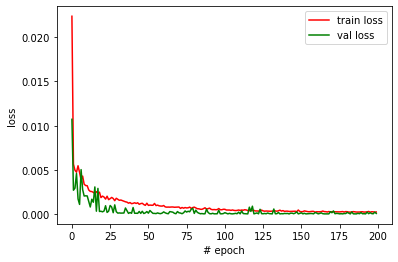

In [8]:
plt.plot(history.history['loss'],'r',label='train loss')
plt.plot(history.history['val_loss'],'g',label='val loss')
plt.xlabel('# epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [9]:
result=model.predict(test_data)

from sklearn.metrics import r2_score

r2=r2_score(test_target,result)
print('r2 score:',r2)

r2 score: 0.9902077272781703


In [10]:
score = model.evaluate(test_data, test_target, verbose = 0) 
print("%s: %.2f%%" % (model.metrics_names[0], score[0]))
print("%s: %.2f%%" % (model.metrics_names[1], score[1]))
print("%s: %.2f%%" % (model.metrics_names[2], score[2]))
print("%s: %.2f%%" % (model.metrics_names[3], score[3]))
#print('Test loss:', score[0]) 
print('MAPE:', score[3])

loss: 0.00%
mse: 0.00%
mae: 0.02%
mape: 50934.69%
MAPE: 50934.69140625


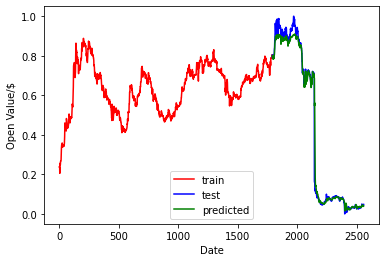

In [11]:
#test_x_range=np.arange(1000,1209,1)
test_x_range=np.arange(1791,2559,1)
#test_x_range is an array of values between 1000-1208

plt.plot(train_target,'r',label='train')
plt.plot(test_x_range,test_target,'b',label='test')
plt.plot(test_x_range,result,'g',label='predicted')

plt.xlabel('Date')
plt.ylabel('Open Value/$')
plt.legend()
plt.show()

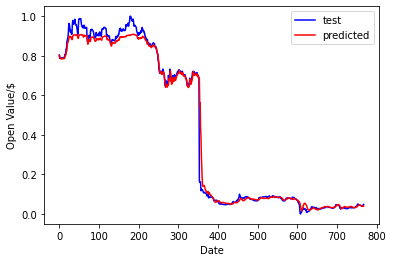

In [12]:
plt.plot(test_target,'b',label='test')
plt.plot(result,'r',label='predicted')

plt.xlabel('Date')
plt.ylabel('Open Value/$')
plt.legend()
plt.show()